# TCSS 487 Homework #3
### Michael Theisen and Trevor Tomlin

## Hierarchical Clustering:

### 1. Write R code to apply hierarchical complete-link clustering algorithm to identify gene clusters from “gene_expression_n438x978.txt”.

In [17]:
# Load the file “gene_expression_n438x978.txt”. 

gene.expr <- read.table ("gene_expression_n438x978.txt", sep="\t", header=T)
gene.expr <- t(gene.expr[, -1])
dim(gene.expr)

[1] 978 438

In [18]:
gene.expr[1:5, 1:6]

PSME1,-0.015159099,-0.02681198,0.0010179582,-0.004398264,0.001838965,-0.0003519442
ATF1,-0.031470528,0.01215198,-0.0086506221,0.055387992,-0.018079188,0.0129305436
RHEB,-0.004733488,-0.02555015,-0.0181286977,0.004658520,-0.011855532,-0.0031503975
FOXO3,0.025910609,-0.02401181,-0.0207997145,0.013807318,-0.037050333,0.0207519580
RHOA,0.005629677,-0.01067174,-0.0002722781,-0.034069735,-0.013395496,-0.0237654746


### 1.a. First, use the Euclidean distance to compute pairwise distances.

In [44]:
d <- dist (gene.expr, method="euclidean")


Call:
hclust(d = d, method = "complete")

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 978 


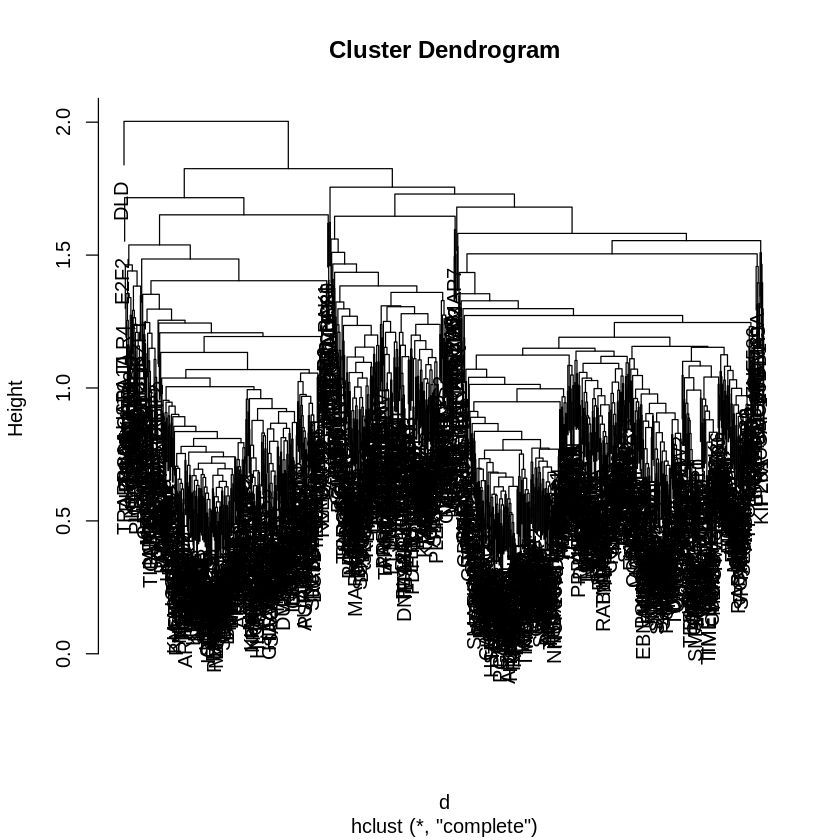

In [45]:
# resulting cluster and dendrogram
ret.hclust <- hclust (d, method="complete")
ret.hclust
plot(ret.hclust)

### 1.b. Second, use the correlation coefficient to compute pairwise distances.

In [46]:
dd <- as.dist ((1 - cor(t(gene.expr)))/2)


Call:
hclust(d = dd, method = "complete")

Cluster method   : complete 
Number of objects: 978 


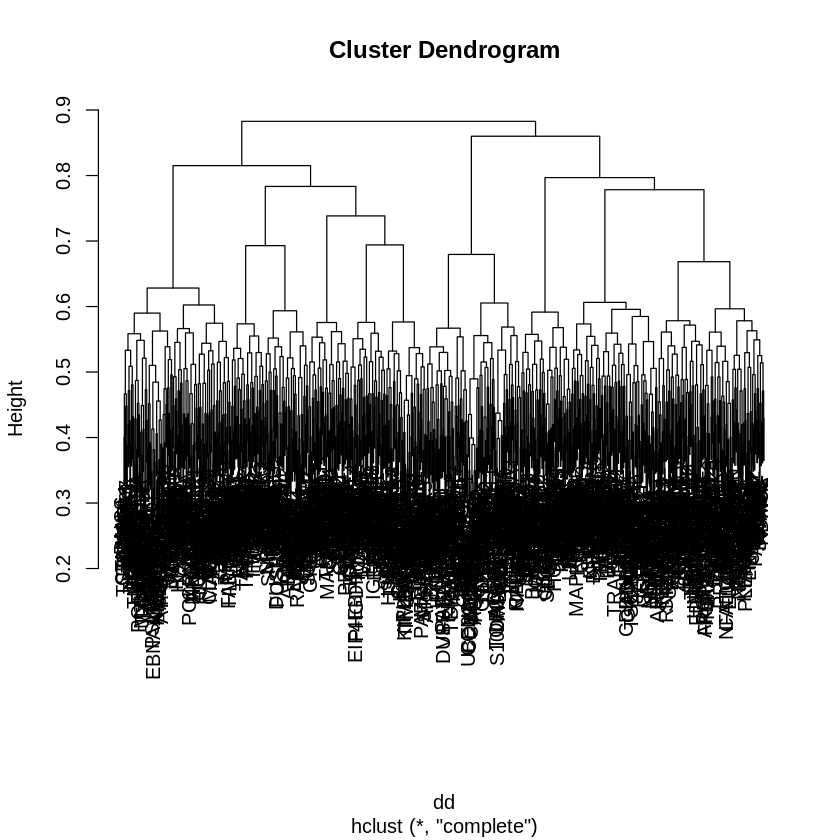

In [47]:
# resulting cluster and dendrogram
ret.hclust1 <- hclust (dd, method="complete")
ret.hclust1
plot(ret.hclust1)

### 1.c. Visualize the resulting clusters from (a) and (b) using heatmaps.

In [48]:
if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")
BiocManager::install(c("gplots", "cluster"))

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.14 (BiocManager 1.30.20), R 4.1.1 (2021-08-10)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'gplots' 'cluster'”
Old packages: 'arkhe', 'brew', 'broom', 'cachem', 'caret', 'class', 'classInt',
  'cli', 'codetools', 'colorspace', 'conflicted', 'covr', 'credentials',
  'curl', 'data.table', 'dbplyr', 'devtools', 'dplyr', 'DT', 'dtplyr', 'e1071',
  'evaluate', 'expm', 'fansi', 'fastmap', 'FNN', 'fontawesome', 'forcats',
  'forecast', 'fracdiff', 'fs', 'future', 'gargle', 'gert', 'ggplot2',
  'ggrepel', 'gh', 'git2r', 'gitcreds', 'gower', 'gstat', 'gtools', 'haven',
  'highr', 'htmlwidgets', 'httpuv', 'httr', 'IRdisplay', 'IRkernel', 'isoband',
  'janitor', 'keras', 'knitr', 'lava', 'lhs', 'lmt

In [49]:
library (gplots)

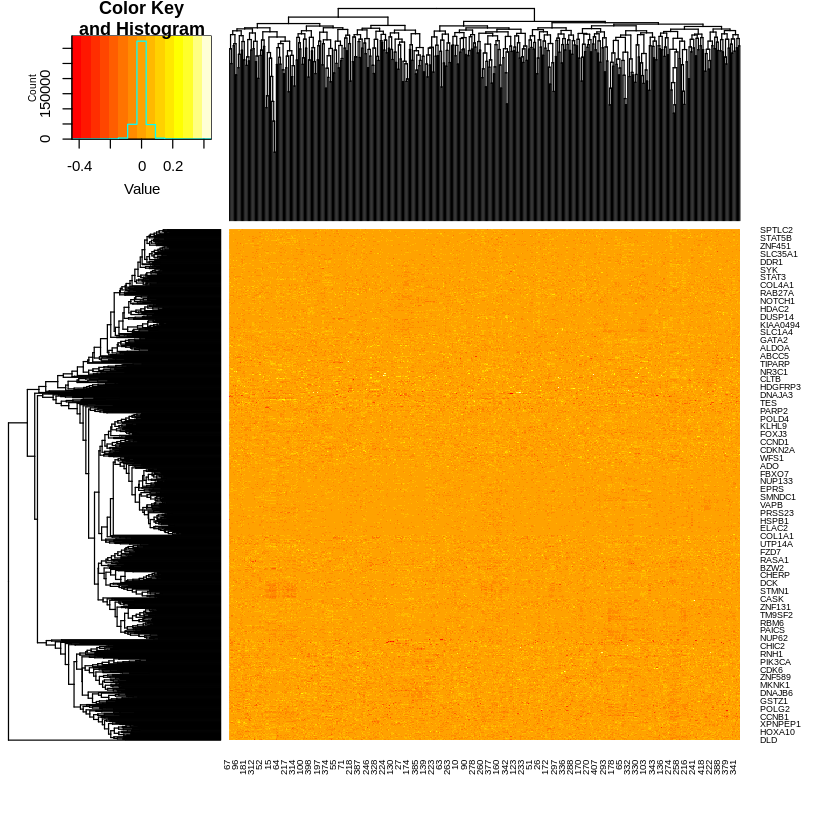

In [50]:
heatmap.2 (as.matrix(gene.expr), trace="none")

In [51]:
newdist <- function (x) {as.dist ((1 - cor(t(x)))/2)}

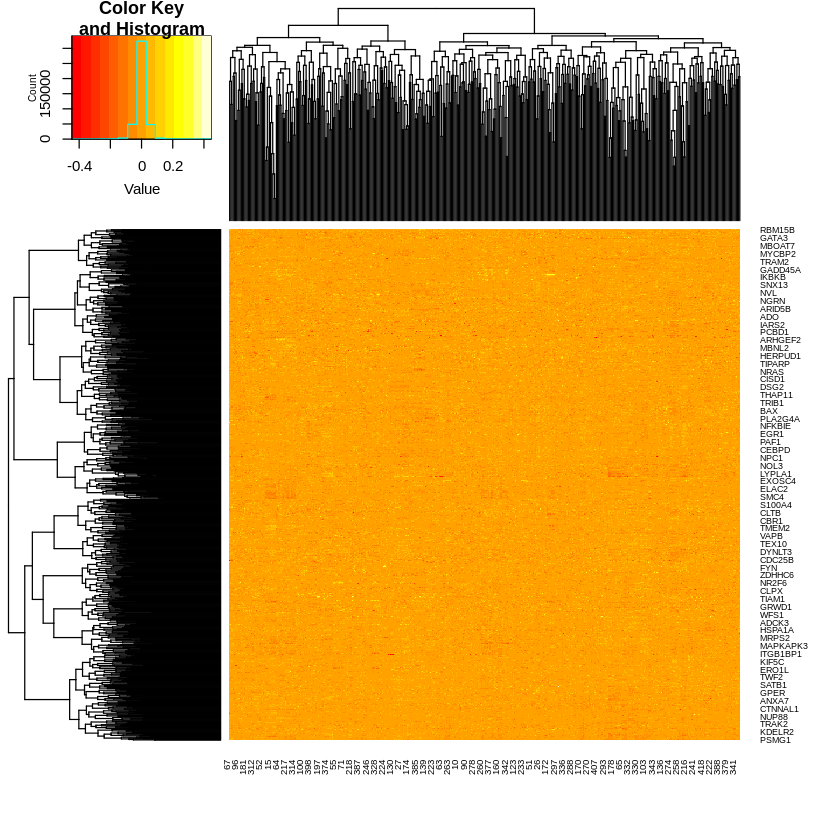

In [52]:
heatmap.2 (as.matrix(gene.expr), trace="none", distfun=newdist)

### 1.d. What are the differences between these two pairwise distance measures?

The differences between these two pairwise distance measurements seem to be minimal at best, judging by the heatmaps despite the drastic difference between the dengrograms. When looking at the Color Key for the heatmap, we can see that the value is predominantly 0 or very close to it.   

### 1.e. Compare the clusters obtained using the same algorithm (hierarchical complete link) but different distance measures. 

The clusters obtained using the same algorithm with different distance measures are quite different. The clusters in the dendrogram for the Euclidean distance has very distinct peaks and valleys while the clusters in the dendrogram for the Correlation Coefficient display an almost more uniform distribution. Disite this, the heatmaps themselves do not show much differentiation between the two.

## K-means Clustering:

### 2. Write R code to apply k-means clustering algorithm to identify gene clusters from “gene_expression_n438x978.txt”. 

### 2.a. What did you use as the input number of clusters? Why?

We originally chose to use a k = 10 because it seems like a reasonable number to start with and can be adjusted later.

In [53]:
ret.kmeans <- kmeans(gene.expr, 50)

In [54]:
library (cluster)

### 2.b. What is your cluster size distribution? In other words, did you get any small or large clusters? Discuss the cluster size distribution in your report.

In [55]:
sf <- silhouette (ret.kmeans$cluster, dist(gene.expr, method="euclidean"))

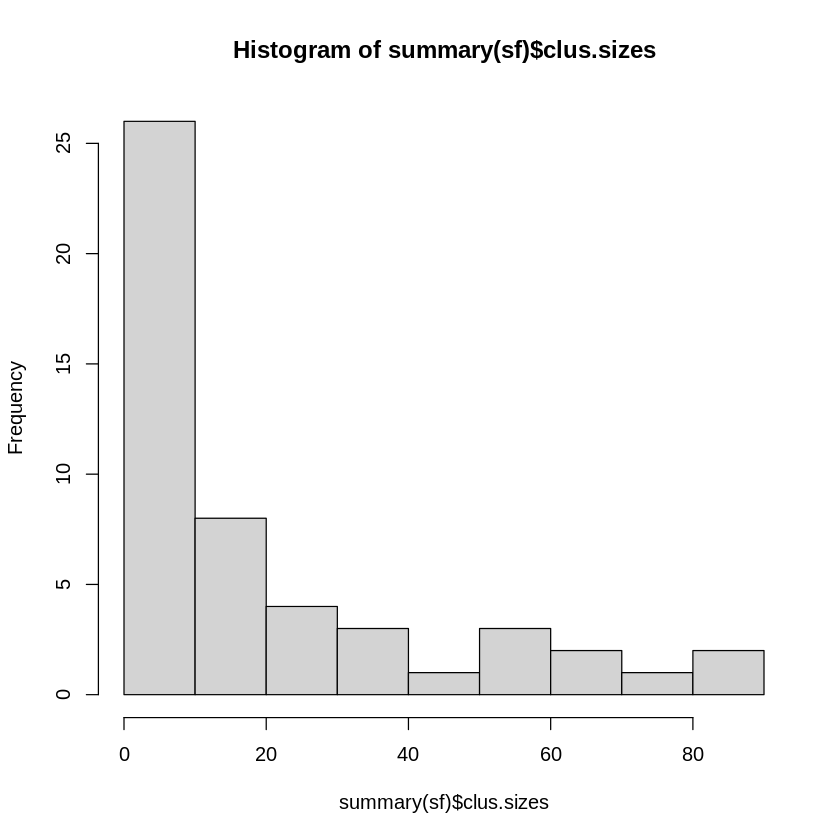

In [56]:
hist(summary(sf)$clus.sizes)

Most of the cluster sizes are less than 20, however the max cluster size is 100.

### 2.c. How are the resulting clusters from k-means different from those from hierarchical complete link? Discuss.

The resulting clusters from k-means are different to those from hierarchical in that they are better partitioned due to using and exhaustive search for a global optimum instead of a greedy strategy like the hierarchical complete link based on largest distance.  

### 2.d. How do you visualize the resulting clusters? Discuss and show sample visualization images in the notebook.

We plotted the resulting clusters much like that of during our lab. We used a silhouette plot.

In [59]:
summary(sf)

Silhouette of 978 units in 50 clusters from silhouette.default(x = ret.kmeans$cluster, dist = dist(gene.expr, method = "euclidean")) :
 Cluster sizes and average silhouette widths:
          88           32           25            1            3           52 
-0.005170979 -0.055584357 -0.067373791  0.000000000 -0.072443705  0.032573210 
          20            1            1            2            1            3 
-0.098668187  0.000000000  0.000000000 -0.146912438  0.000000000 -0.158379217 
          15           43           14            1           10            1 
-0.110974034 -0.030133373 -0.084761944  0.000000000 -0.128996585  0.000000000 
          18            1            1            1           76           84 
 0.018170496  0.000000000  0.000000000  0.000000000  0.014284891  0.022603719 
          69            1            2            3            1           34 
-0.010496803  0.000000000 -0.122674566 -0.112152715  0.000000000 -0.026762965 
          66            4    

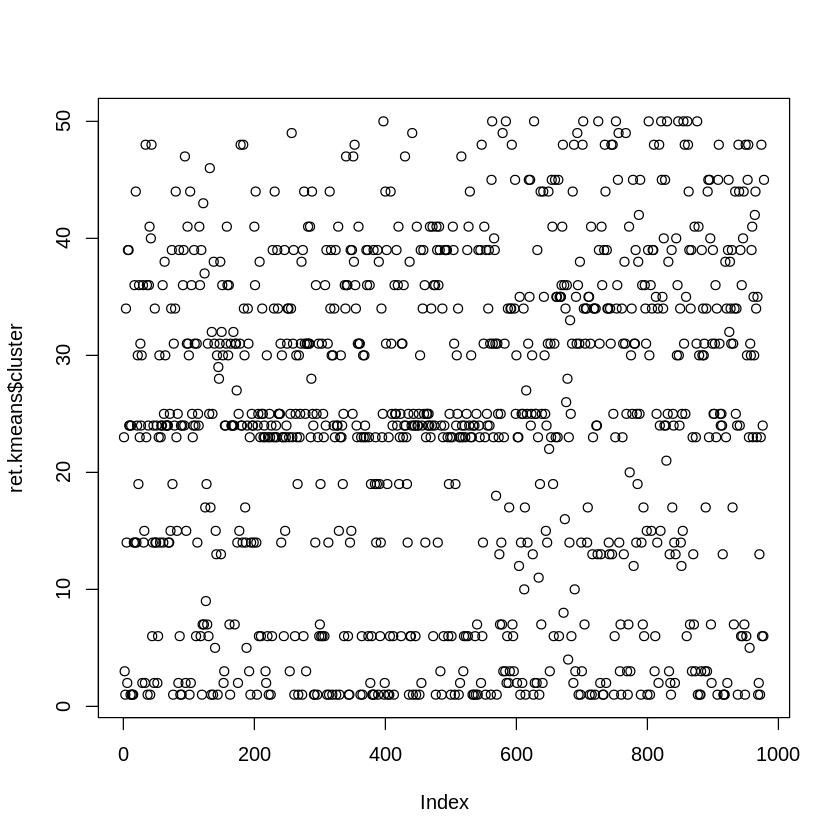

In [60]:
plot(ret.kmeans$cluster)

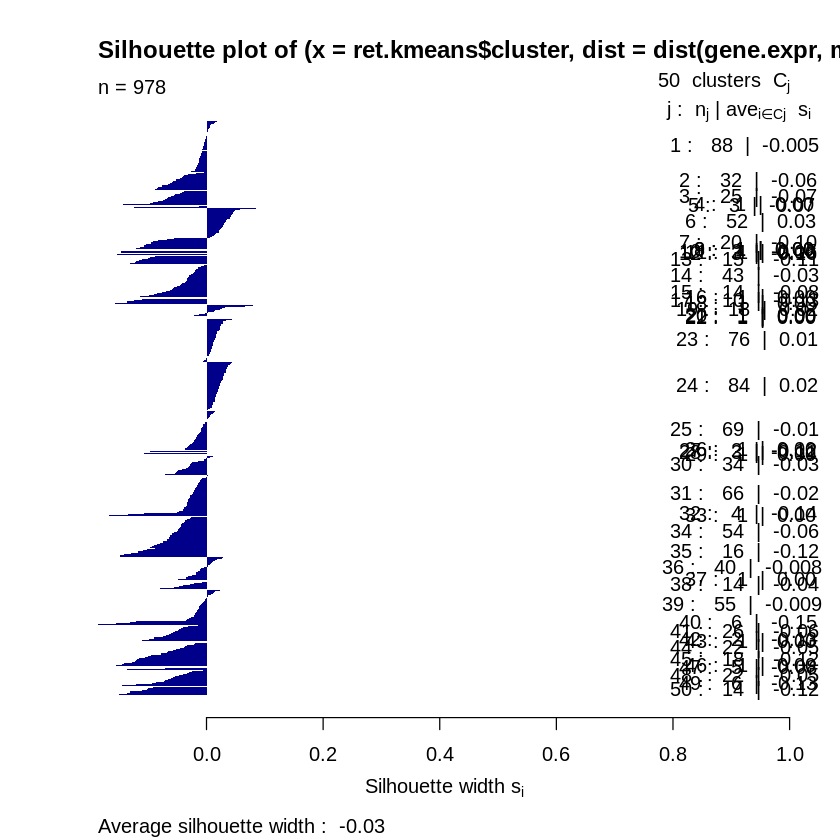

In [61]:
plot(sf, col="darkblue", border=NA)